# Clustering

## Importación de Liberías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import LabelEncoder

from ucimlrepo import fetch_ucirepo

## Dataset

In [2]:
iris = fetch_ucirepo(id=53)

In [3]:
iris.metadata

{'uci_id': 53,
 'name': 'Iris',
 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris',
 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv',
 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 150,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1936,
 'last_updated': 'Tue Sep 12 2023',
 'dataset_doi': '10.24432/C56C76',
 'creators': ['R. A. Fisher'],
 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica',
  'authors': 'A. Unwin, K. Kleinman',
  'published_in': 'Significance, 2021',
  'year': 2021,
  'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e',
  '

In [4]:
iris.variables

,name,role,type,demographic,description,units,missing_values
0,sepal length,Feature,Continuous,None,None,cm,no
1,sepal width,Feature,Continuous,None,None,cm,no
2,petal length,Feature,Continuous,None,None,cm,no
3,petal width,Feature,Continuous,None,None,cm,no
4,class,Target,Categorical,None,"class of iris plant: Iris Setosa, Iris Versico...",None,no


### Features & Target

In [5]:
X = iris.data.features
y = iris.data.targets

In [6]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [8]:
y['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualización de datos

In [9]:
data = X.join(y)

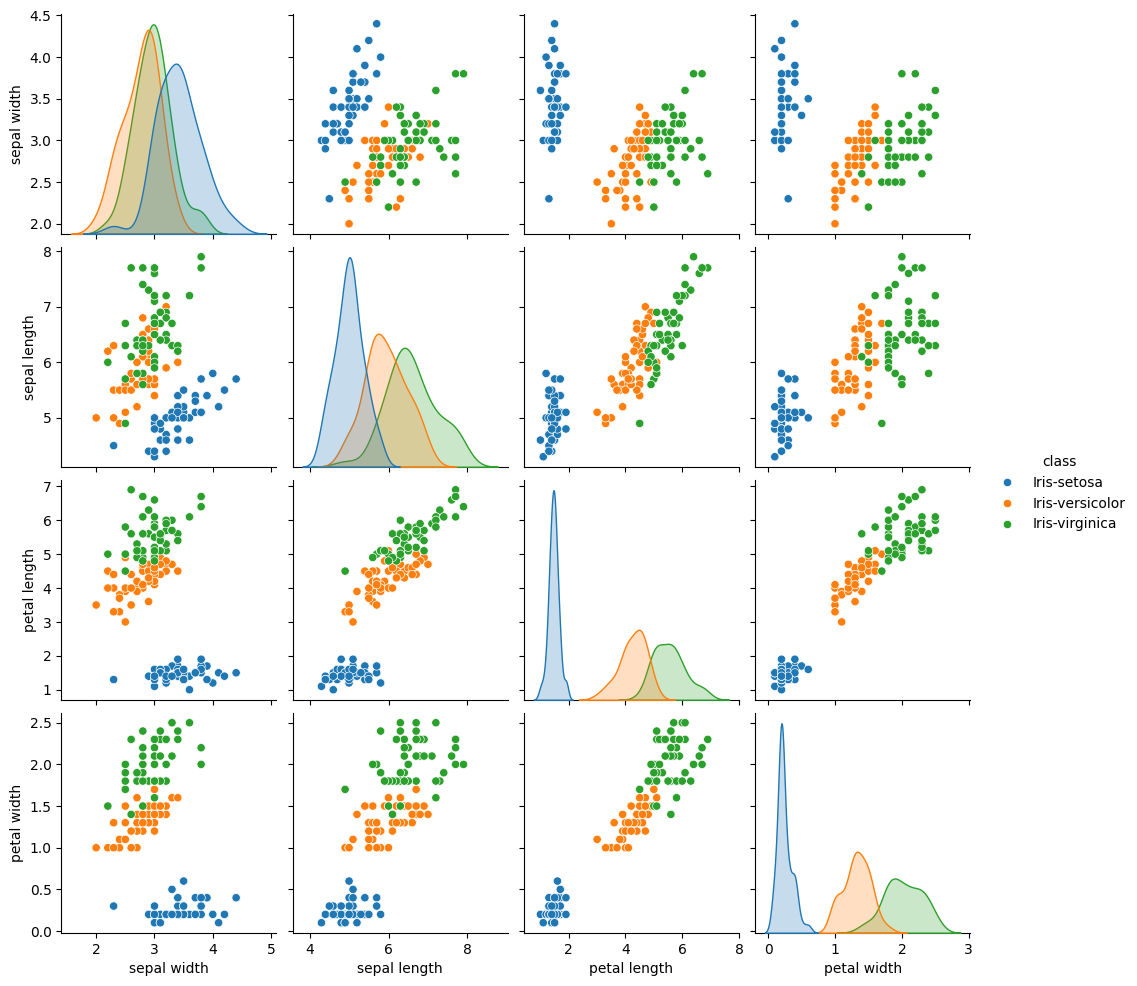

In [10]:
sns.pairplot(data, hue='class', vars=['sepal width','sepal length','petal length','petal width'], kind='scatter')

### Codificación Target

In [11]:
label_encoder = LabelEncoder()

In [12]:
y = label_encoder.fit_transform(y['class'])
y = pd.DataFrame(data={'target': y})
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Entrenamiento del modelo de Clustering

### K-Means

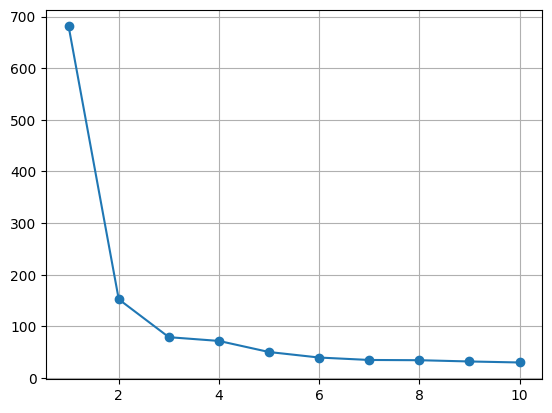

In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(random_state=5, max_iter=300, n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.grid()
plt.plot(range(1, 11), inertia, marker="o")
plt.show()

In [22]:
kmeans = KMeans(random_state=10, max_iter=300, n_clusters=3)
kmeans.fit(X)
# Clusters
kmeans.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [23]:
df_iris = X.join(y)
df_iris["cluster"] = kmeans.labels_

grouped_iris = (
    df_iris
    .groupby(["target", "cluster"])
    .agg({"petal length": "count"})
)
grouped_iris

petal length
target cluster              
0      1                  50
1      0                   3
       2                  47
2      0                  36
       2                  14

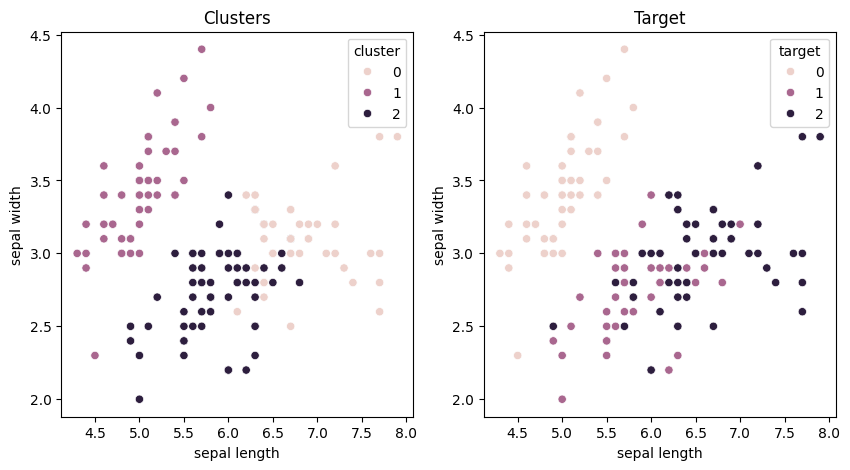

In [24]:
_, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.scatterplot(ax=ax[0], data=df_iris, hue="cluster", x="sepal length", y="sepal width")
ax[0].set_title("Clusters")

sns.scatterplot(ax=ax[1], data=df_iris, hue="target", x="sepal length", y="sepal width")
ax[1].set_title("Target")

plt.show()

### DBSCAN

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)

In [18]:
df_iris = X.join(y)
df_iris["cluster"] = y_pred
df_iris

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [19]:
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [20]:
grouped_iris = (
    df_iris
    .groupby(["target", "cluster"])
    .agg({"petal length": "count"})
)
grouped_iris

petal length
target cluster              
0      -1                  1
        0                 49
1      -1                  6
        1                 44
2      -1                 10
        1                 40

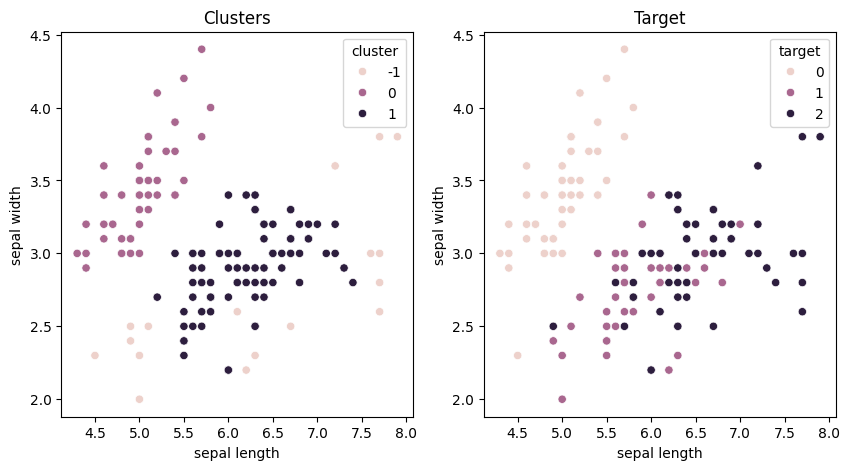

In [21]:
_, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.scatterplot(ax=ax[0], data=df_iris, hue="cluster", x="sepal length", y="sepal width")
ax[0].set_title("Clusters")

sns.scatterplot(ax=ax[1], data=df_iris, hue="target", x="sepal length", y="sepal width")
ax[1].set_title("Target")

plt.show()